# testing different models

In [1]:
import torch
# from torch.utils.data import Dataset
from torchvision import datasets 
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

import configs

from shallowNN import NeuralNetwork

In [2]:
from configs import device

In [3]:
test_data = datasets.MNIST(
    configs.dataset_path,
    download=False,
    transform=ToTensor(),
)

In [4]:

def visual_test(model, test_data):
    figure = plt.figure(figsize=(8, 8))
    cols, rows = 3,3
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(test_data), size=(1,)).item()
        img, label = test_data[sample_idx]
        cuimg = torch.tensor(img).to('cuda')
        pred = model(cuimg)
        pred_label = pred.argmax(1).item()
        figure.add_subplot(rows, cols, i)
        plt.title(f"pred: {pred_label} actual:{label}")
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")
    plt.show()


### Loading saved models for testing

/tmp/ipykernel_77263/1973996404.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  cuimg = torch.tensor(img).to('cuda')


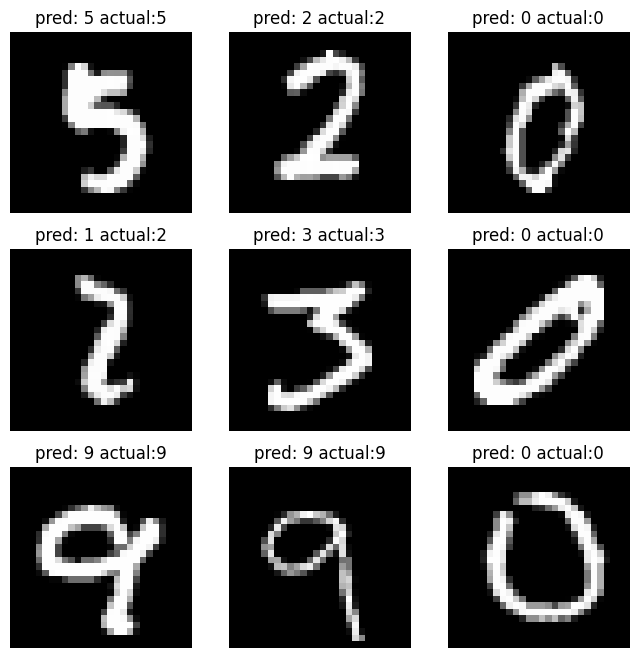

In [6]:
model = torch.load('./trained_models/shallowNN90%.pth', weights_only=False)
visual_test(model, test_data)